<a href="https://colab.research.google.com/github/nascimento-luciano/Artificial-Intelligence/blob/master/A_Brief_Analysis_of_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#---------------------------------Etapa 1--------------------------------------
#Importanto bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
#import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go

In [8]:
!pip install geopandas

In [9]:
#Importando Arquivo CSV

covid_cases = pd.read_csv('worldometer_coronavirus_daily_data.csv')
covid_vaxxs = pd.read_csv('country_vaccinations.csv')

In [10]:
# Step 1: Let's make sure each dataset uses the same name for two of the countries we will be looking at
def fix_country_name(country):
    name_dict = {
        'USA': 'United States',
        'UK': 'United Kingdom'
     }
    try:
      return name_dict[country]
    except KeyError:
      return country

covid_cases.country = covid_cases.country.apply(fix_country_name)

In [11]:
# let's just look at 4 countries for now...
countries_of_interest = ["United Kingdom", "United States", "Canada", "China"]


# Step 2: Let's start cleaning the data by filtering the data to the subset of countries we want. 
covid_cases_subset = covid_cases[covid_cases.country.isin (countries_of_interest)]
covid_vaxxs_subset = covid_vaxxs[covid_vaxxs.country.isin (countries_of_interest)]

In [12]:
# Step 3: Let's merge the databases using the dates and countries
    
merged_data = pd.merge_ordered(covid_cases_subset, covid_vaxxs_subset, \
                               left_on=['date', 'country'], \
                               right_on=['date', 'country'])

# Let's remove unnecessary columns
merged_data.drop(columns=['iso_code', 'source_name', 'source_website', 'vaccines',\
                           'daily_vaccinations_per_million', 'daily_vaccinations_raw'], inplace=True)

In [13]:
# Step 4: Let's handle the NaNs 
merged_data.fillna({'total_vaccinations':0, 'people_vaccinated':0, 'people_fully_vaccinated':0,\
                 'daily_vaccinations':0,'total_vaccinations_per_hundred':0,\
                 'people_vaccinated_per_hundred':0 ,'people_fully_vaccinated_per_hundred':0}\
                 ,inplace=True)

covid_data = merged_data.dropna(how='any', subset=['cumulative_total_cases'])

In [14]:
# Step 5: Let's also set the index to date    
covid_data.set_index('date', inplace=True)

In [15]:
# Step 6: Let's change the index into a datetime object now
covid_data.index = pd.to_datetime(covid_data.index, errors='coerce', infer_datetime_format=True)

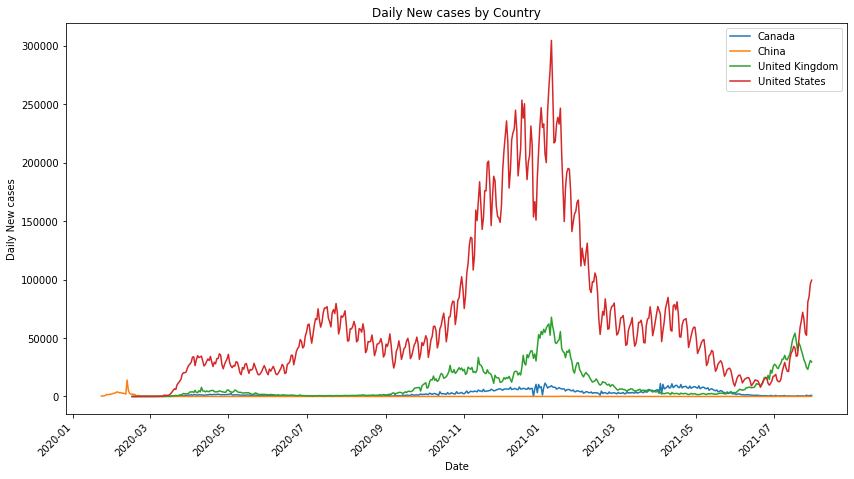

In [16]:
# Take a look at the rates of infection
plt.figure(figsize=(14, 8))
covid_data.groupby('country').daily_new_cases.plot(legend=True,rot=45)

plt.ylabel('Daily New cases')
plt.xlabel('Date')
plt.title('Daily New cases by Country');

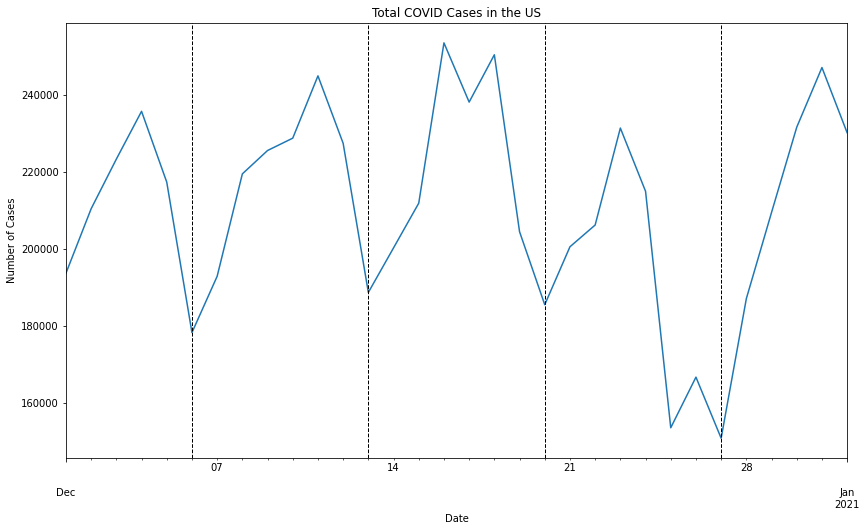

In [17]:
# Now let's blow the plot up and look at the pattern. 
week_intervals = ['12/6/2020','12/13/2020','12/20/2020','12/27/2020']

plt.figure(figsize=(14, 8))
covid_data[covid_data.country == 'United States'] \
  .loc['12/1/2020':'1/1/2021'].daily_new_cases.plot()

{plt.axvline(d, color='k', linestyle='dashed', linewidth=1) for d in week_intervals}

plt.ylabel('Number of Cases')
plt.xlabel('Date')
plt.title('Total COVID Cases in the US');

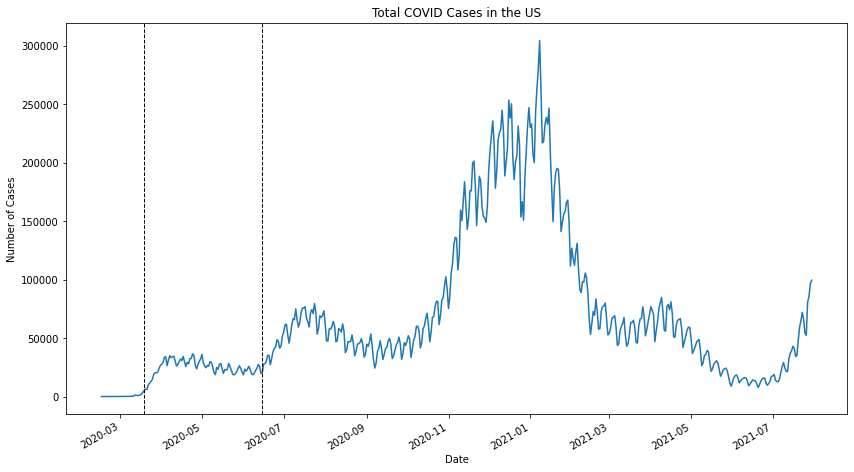

In [18]:
# Did lockdowns help?
plt.figure(figsize=(14, 8))
covid_data[covid_data.country == 'United States'].daily_new_cases.plot()

# Date of the first stategoing into lockdown (CA) 
plt.axvline('3/19/2020', color='k', linestyle='dashed', linewidth=1) 
# Date of New York reopening 
plt.axvline('6/15/2020', color='k', linestyle='dashed', linewidth=1)

plt.ylabel('Number of Cases')
plt.xlabel('Date')
plt.title('Total COVID Cases in the US');

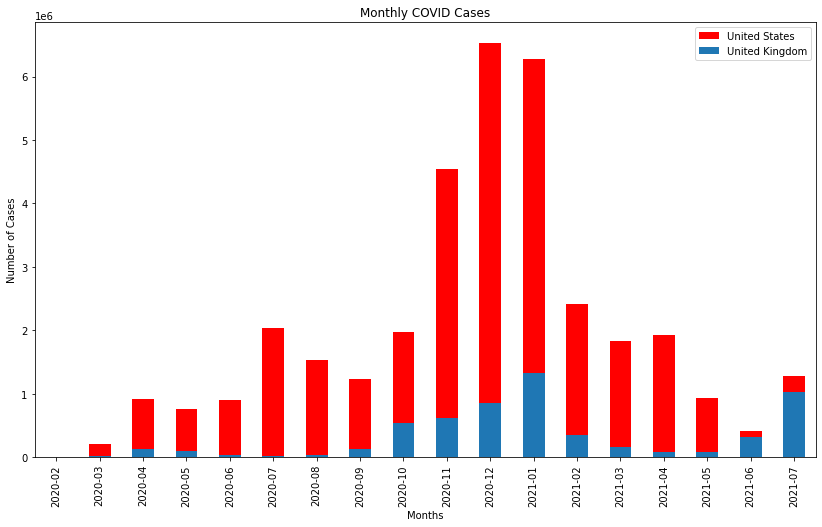

In [19]:
# Does time of year matter for infections?
US_infections = covid_data[covid_data.country == 'United States']
UK_infections = covid_data[covid_data.country == 'United Kingdom']

plt.figure(figsize=(14, 8))
US_infections['daily_new_cases']\
  .groupby(US_infections.index.to_period('M'))\
  .sum().plot(kind='bar', legend=False, color='r')

UK_infections['daily_new_cases']\
  .groupby(UK_infections.index.to_period('M'))\
  .sum().plot(kind='bar', legend=False)

plt.legend(['United States', 'United Kingdom'])
plt.ylabel('Number of Cases')
plt.xlabel('Months')
plt.title('Monthly COVID Cases');

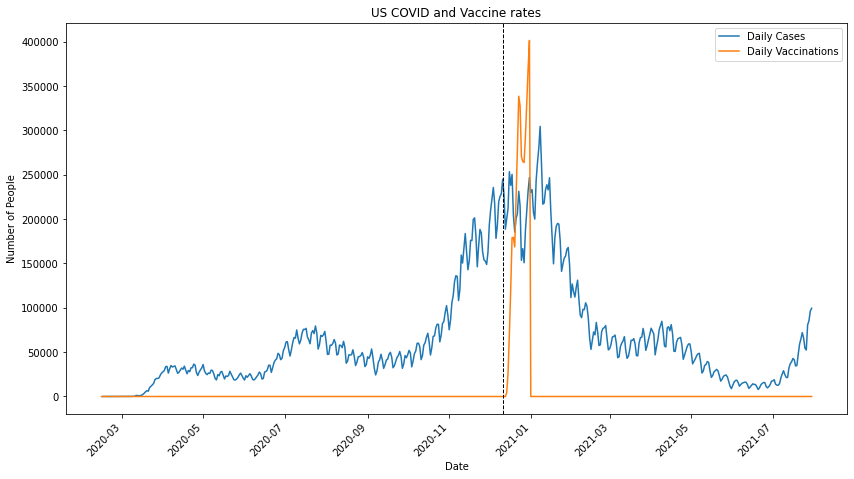

In [20]:
# See how the pattern changes from country to country
plt.figure(figsize=(14, 8))
covid_data[covid_data.country == 'United States'].daily_new_cases.plot(legend=False,rot=45)
covid_data[covid_data.country == 'United States'].daily_vaccinations.plot(legend=False,rot=45)

# Mark the start of the vaccine release
plt.axvline('12/11/2020', color='k', linestyle='dashed', linewidth=1)

plt.legend(['Daily Cases', 'Daily Vaccinations'])
plt.ylabel('Number of People')
plt.xlabel('Date')
plt.title('US COVID and Vaccine rates');